<a href="https://colab.research.google.com/github/EdwSanA/DPro_Tareas/blob/main/SimpleConv1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 CNN 1D DESDE CERO - VERSIÓN OPTIMIZADA

🚀 EJECUTANDO VERSIÓN OPTIMIZADA
📥 Cargando datos MNIST...
🔄 Preprocesando datos...
🔬 Muestra de demostración:
   • Entrenamiento: (1000, 784)
   • Validación: (200, 784)

🏗️ Creando modelo CNN 1D...

🚀 Iniciando entrenamiento...
🚀 Iniciando entrenamiento...
📊 1000 muestras, 31 batches por época
Epoch  1/5 - Loss: 2.3038 Acc: 0.0958 - Val Loss: 2.2925 Val Acc: 0.1250
Epoch  2/5 - Loss: 2.3016 Acc: 0.1109 - Val Loss: 2.2895 Val Acc: 0.1250
Epoch  3/5 - Loss: 2.3009 Acc: 0.1220 - Val Loss: 2.2876 Val Acc: 0.1250
Epoch  4/5 - Loss: 2.3005 Acc: 0.1240 - Val Loss: 2.2878 Val Acc: 0.1950
Epoch  5/5 - Loss: 2.3000 Acc: 0.1280 - Val Loss: 2.2873 Val Acc: 0.2100

📊 Evaluando modelo...
🎯 Precisión final: 0.2100


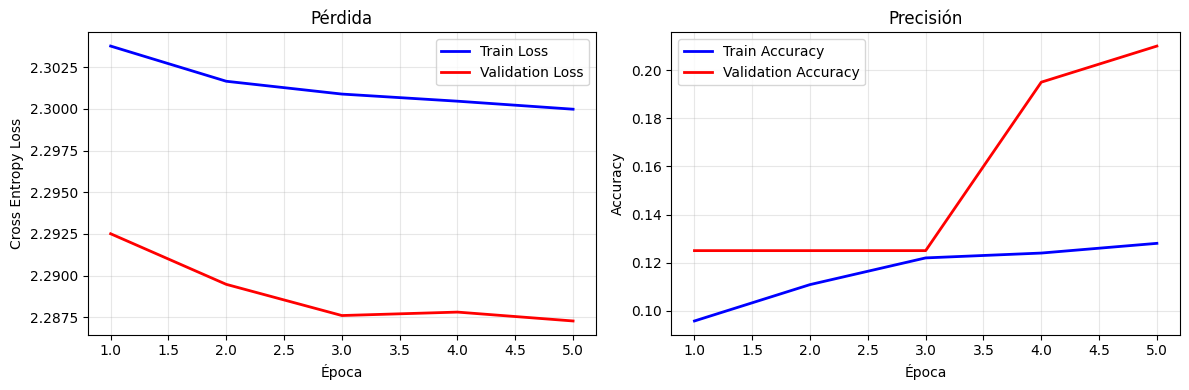


📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.25      0.96      0.40        27
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        16
           7       0.16      0.64      0.26        25
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00        21

    accuracy                           0.21       200
   macro avg       0.04      0.16      0.07       200
weighted avg       0.05      0.21      0.09       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


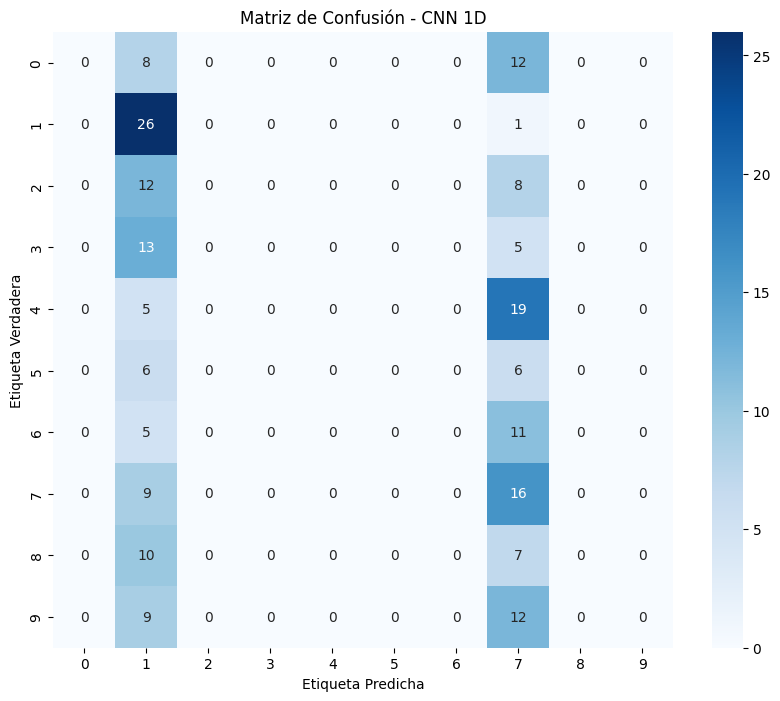


🎉 ¡ENTRENAMIENTO COMPLETADO!
🏆 Precisión final: 21.0%


In [6]:
# ============================================================================
# VERSIÓN OPTIMIZADA Y RÁPIDA PARA GOOGLE COLAB
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("🚀 CNN 1D DESDE CERO - VERSIÓN OPTIMIZADA")
print("=" * 80)

# ============================================================================
# CLASES OPTIMIZADAS
# ============================================================================

class SimpleConv1d:
    def __init__(self, filter_size, learning_rate=0.01):
        self.filter_size = filter_size
        self.learning_rate = learning_rate
        self.w = np.random.normal(0, 0.1, filter_size)
        self.b = np.zeros(1)
        self.dw = np.zeros_like(self.w)
        self.db = np.zeros_like(self.b)

    def forward(self, x):
        self.x = x
        input_size = len(x)
        output_size = input_size - self.filter_size + 1
        a = np.zeros(output_size)

        for i in range(output_size):
            window = x[i:i + self.filter_size]
            a[i] = np.sum(window * self.w) + self.b[0]

        self.a = a
        return a

    def backward(self, delta_a):
        output_size = len(delta_a)
        input_size = len(self.x)

        self.dw = np.zeros_like(self.w)
        self.db = np.zeros_like(self.b)
        delta_x = np.zeros_like(self.x)

        for s in range(self.filter_size):
            for i in range(output_size):
                self.dw[s] += delta_a[i] * self.x[i + s]

        self.db[0] = np.sum(delta_a)

        for j in range(input_size):
            for s in range(self.filter_size):
                i = j - s
                if 0 <= i < output_size:
                    delta_x[j] += delta_a[i] * self.w[s]

        return delta_x

    def update_weights(self):
        self.w -= self.learning_rate * self.dw
        self.b -= self.learning_rate * self.db

def calculate_output_size(input_size, filter_size, padding=0, stride=1):
    return (input_size + 2 * padding - filter_size) // stride + 1

class Conv1d:
    def __init__(self, in_channels, out_channels, filter_size, stride=1, padding=0, learning_rate=0.01):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.filter_size = filter_size
        self.stride = stride
        self.padding = padding
        self.learning_rate = learning_rate

        # Inicialización más simple
        self.w = np.random.normal(0, 0.1, (out_channels, in_channels, filter_size))
        self.b = np.zeros(out_channels)
        self.dw = np.zeros_like(self.w)
        self.db = np.zeros_like(self.b)

    def _apply_padding(self, x):
        if self.padding == 0:
            return x
        if len(x.shape) == 2:
            return np.pad(x, ((0, 0), (self.padding, self.padding)), mode='constant', constant_values=0)
        else:
            return np.pad(x, ((0, 0), (0, 0), (self.padding, self.padding)), mode='constant', constant_values=0)

    def forward(self, x):
        if len(x.shape) == 1:
            x = x.reshape(1, -1)
            is_batch = False
        elif len(x.shape) == 2:
            is_batch = False
        elif len(x.shape) == 3:
            is_batch = True
        else:
            raise ValueError(f"Forma no soportada: {x.shape}")

        if is_batch:
            outputs = []
            for i in range(x.shape[0]):
                outputs.append(self._forward_single(x[i]))
            return np.array(outputs)
        else:
            return self._forward_single(x)

    def _forward_single(self, x):
        self.x_original = x
        x_padded = self._apply_padding(x)
        self.x_padded = x_padded

        input_size = x_padded.shape[1]
        output_size = calculate_output_size(input_size, self.filter_size, 0, self.stride)

        a = np.zeros((self.out_channels, output_size))

        for out_ch in range(self.out_channels):
            for i in range(0, output_size * self.stride, self.stride):
                idx = i // self.stride
                if idx >= output_size:
                    break

                conv_sum = 0
                for in_ch in range(self.in_channels):
                    start_idx = i
                    end_idx = start_idx + self.filter_size

                    if end_idx <= input_size:
                        window = x_padded[in_ch, start_idx:end_idx]
                        conv_sum += np.sum(window * self.w[out_ch, in_ch, :])

                a[out_ch, idx] = conv_sum + self.b[out_ch]

        self.a = a
        return a

    def backward(self, delta_a):
        if len(delta_a.shape) == 3:
            delta_x_batch = []
            for i in range(delta_a.shape[0]):
                delta_x_batch.append(self._backward_single(delta_a[i]))
            return np.array(delta_x_batch)
        else:
            return self._backward_single(delta_a)

    def _backward_single(self, delta_a):
        output_size = delta_a.shape[1]
        input_size = self.x_padded.shape[1]

        self.dw = np.zeros_like(self.w)
        self.db = np.zeros_like(self.b)
        delta_x_padded = np.zeros_like(self.x_padded)

        for out_ch in range(self.out_channels):
            self.db[out_ch] = np.sum(delta_a[out_ch, :])

            for i in range(0, output_size * self.stride, self.stride):
                idx = i // self.stride
                if idx >= output_size:
                    break

                for in_ch in range(self.in_channels):
                    start_idx = i
                    end_idx = start_idx + self.filter_size

                    if end_idx <= input_size:
                        window = self.x_padded[in_ch, start_idx:end_idx]
                        self.dw[out_ch, in_ch, :] += delta_a[out_ch, idx] * window
                        delta_x_padded[in_ch, start_idx:end_idx] += delta_a[out_ch, idx] * self.w[out_ch, in_ch, :]

        if self.padding > 0:
            delta_x = delta_x_padded[:, self.padding:-self.padding]
        else:
            delta_x = delta_x_padded

        return delta_x

    def update_weights(self):
        self.w -= self.learning_rate * self.dw
        self.b -= self.learning_rate * self.db

class ReLU:
    def forward(self, x):
        self.x = x.copy()
        return np.maximum(0, x)

    def backward(self, delta_a):
        return delta_a * (self.x > 0)

class FullyConnected:
    def __init__(self, input_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.w = np.random.normal(0, 0.1, (input_size, output_size))
        self.b = np.zeros(output_size)
        self.dw = np.zeros_like(self.w)
        self.db = np.zeros_like(self.b)

    def forward(self, x):
        self.x = x
        return x @ self.w + self.b

    def backward(self, delta_a):
        self.dw = self.x.T @ delta_a
        self.db = np.sum(delta_a, axis=0)
        return delta_a @ self.w.T

    def update_weights(self):
        self.w -= self.learning_rate * self.dw
        self.b -= self.learning_rate * self.db

class Softmax:
    def forward(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        self.a = exp_x / np.sum(exp_x, axis=1, keepdims=True)
        return self.a

    def backward(self, y_true):
        return self.a - y_true

class Scratch1dCNNClassifier:
    def __init__(self, conv_filters=[4, 8], conv_filter_sizes=[3, 3], fc_sizes=[16], n_classes=10, learning_rate=0.01):
        self.conv_filters = conv_filters
        self.conv_filter_sizes = conv_filter_sizes
        self.fc_sizes = fc_sizes
        self.n_classes = n_classes
        self.learning_rate = learning_rate

        self.layers = []
        self.fc_layers_objects = []
        self.build_model()

        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def build_model(self):
        in_channels = 1
        for filters, filter_size in zip(self.conv_filters, self.conv_filter_sizes):
            conv_layer = Conv1d(in_channels, filters, filter_size, padding=filter_size//2, learning_rate=self.learning_rate)
            relu_layer = ReLU()
            self.layers.extend([conv_layer, relu_layer])
            in_channels = filters

        self.fc_initialized = False
        self.softmax = Softmax()

    def _initialize_fc_layers(self, input_size):
        if self.fc_initialized:
            return

        prev_size = input_size
        for fc_size in self.fc_sizes:
            fc_layer = FullyConnected(prev_size, fc_size, self.learning_rate)
            relu_layer = ReLU()
            self.fc_layers_objects.extend([fc_layer, relu_layer])
            prev_size = fc_size

        output_layer = FullyConnected(prev_size, self.n_classes, self.learning_rate)
        self.fc_layers_objects.append(output_layer)
        self.fc_initialized = True

    def forward(self, x):
        if len(x.shape) == 2:
            x = x.reshape(x.shape[0], 1, -1)

        current_output = x

        for layer in self.layers:
            current_output = layer.forward(current_output)

        batch_size = current_output.shape[0]
        flat_size = current_output.shape[1] * current_output.shape[2]

        if not self.fc_initialized:
            self._initialize_fc_layers(flat_size)

        current_output = current_output.reshape(batch_size, -1)

        for layer in self.fc_layers_objects:
            current_output = layer.forward(current_output)

        current_output = self.softmax.forward(current_output)
        return current_output

    def backward(self, y_true):
        delta = self.softmax.backward(y_true)

        for layer in reversed(self.fc_layers_objects):
            delta = layer.backward(delta)

        batch_size = delta.shape[0]
        dummy_input = np.ones((1, 1, 784))
        dummy_output = dummy_input
        for layer in self.layers:
            dummy_output = layer.forward(dummy_output)

        target_shape = (batch_size, dummy_output.shape[1], dummy_output.shape[2])
        delta = delta.reshape(target_shape)

        for layer in reversed(self.layers):
            delta = layer.backward(delta)

    def update_weights(self):
        for layer in self.layers:
            if hasattr(layer, 'update_weights'):
                layer.update_weights()
        for layer in self.fc_layers_objects:
            if hasattr(layer, 'update_weights'):
                layer.update_weights()

    def cross_entropy_loss(self, y_true, y_pred):
        batch_size = y_true.shape[0]
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        return -np.sum(y_true * np.log(y_pred)) / batch_size

    def accuracy(self, y_true, y_pred):
        y_true_labels = np.argmax(y_true, axis=1)
        y_pred_labels = np.argmax(y_pred, axis=1)
        return np.mean(y_true_labels == y_pred_labels)

    def fit(self, X_train, y_train, X_val=None, y_val=None, epochs=5, batch_size=32, verbose=True):
        n_samples = X_train.shape[0]
        n_batches = max(1, n_samples // batch_size)

        print(f"🚀 Iniciando entrenamiento...")
        print(f"📊 {n_samples} muestras, {n_batches} batches por época")

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_acc = 0

            indices = np.random.permutation(n_samples)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]

            for i in range(n_batches):
                start_idx = i * batch_size
                end_idx = min((i + 1) * batch_size, n_samples)

                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]

                try:
                    y_pred = self.forward(X_batch)
                    loss = self.cross_entropy_loss(y_batch, y_pred)
                    acc = self.accuracy(y_batch, y_pred)

                    epoch_loss += loss
                    epoch_acc += acc

                    self.backward(y_batch)
                    self.update_weights()

                except Exception as e:
                    print(f"⚠️ Error en batch {i}: {e}")
                    continue

            if n_batches > 0:
                epoch_loss /= n_batches
                epoch_acc /= n_batches

            self.train_losses.append(epoch_loss)
            self.train_accuracies.append(epoch_acc)

            if X_val is not None and y_val is not None:
                try:
                    val_pred = self.predict_proba(X_val)
                    val_loss = self.cross_entropy_loss(y_val, val_pred)
                    val_acc = self.accuracy(y_val, val_pred)

                    self.val_losses.append(val_loss)
                    self.val_accuracies.append(val_acc)

                    if verbose:
                        print(f'Epoch {epoch+1:2d}/{epochs} - '
                              f'Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} - '
                              f'Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}')
                except Exception as e:
                    if verbose:
                        print(f'Epoch {epoch+1:2d}/{epochs} - '
                              f'Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    def predict_proba(self, X):
        return self.forward(X)

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

    def plot_learning_curves(self):
        if len(self.train_losses) == 0:
            print("⚠️ No hay datos para graficar")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        epochs = range(1, len(self.train_losses) + 1)

        ax1.plot(epochs, self.train_losses, 'b-', label='Train Loss', linewidth=2)
        if self.val_losses:
            ax1.plot(epochs, self.val_losses, 'r-', label='Validation Loss', linewidth=2)
        ax1.set_title('Pérdida')
        ax1.set_xlabel('Época')
        ax1.set_ylabel('Cross Entropy Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        ax2.plot(epochs, self.train_accuracies, 'b-', label='Train Accuracy', linewidth=2)
        if self.val_accuracies:
            ax2.plot(epochs, self.val_accuracies, 'r-', label='Validation Accuracy', linewidth=2)
        ax2.set_title('Precisión')
        ax2.set_xlabel('Época')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# ============================================================================
# FUNCIÓN PRINCIPAL OPTIMIZADA
# ============================================================================

def main_optimized():
    """Función principal optimizada para ejecución rápida"""
    print("\n🚀 EJECUTANDO VERSIÓN OPTIMIZADA")
    print("=" * 80)

    try:
        # Cargar datos
        print("📥 Cargando datos MNIST...")
        (X_train, y_train), (X_test, y_test) = mnist.load_data()

        # Preprocesar
        print("🔄 Preprocesando datos...")
        X_train_flat = X_train.reshape(X_train.shape[0], -1).astype(np.float32) / 255.0
        X_test_flat = X_test.reshape(X_test.shape[0], -1).astype(np.float32) / 255.0

        # One-hot encoding
        enc = OneHotEncoder(sparse_output=False)
        y_train_onehot = enc.fit_transform(y_train.reshape(-1, 1))
        y_test_onehot = enc.transform(y_test.reshape(-1, 1))

        # MUESTRA PEQUEÑA PARA DEMOSTRACIÓN RÁPIDA
        n_train = 1000
        n_val = 200

        X_train_small = X_train_flat[:n_train]
        y_train_small = y_train_onehot[:n_train]
        X_val_small = X_train_flat[n_train:n_train+n_val]
        y_val_small = y_train_onehot[n_train:n_train+n_val]

        print(f"🔬 Muestra de demostración:")
        print(f"   • Entrenamiento: {X_train_small.shape}")
        print(f"   • Validación: {X_val_small.shape}")

        # Crear modelo
        print("\n🏗️ Creando modelo CNN 1D...")
        model = Scratch1dCNNClassifier(
            conv_filters=[4, 8],
            conv_filter_sizes=[3, 3],
            fc_sizes=[16],
            n_classes=10,
            learning_rate=0.01
        )

        # Entrenar
        print("\n🚀 Iniciando entrenamiento...")
        model.fit(
            X_train_small, y_train_small,
            X_val_small, y_val_small,
            epochs=5,
            batch_size=32,
            verbose=True
        )

        # Evaluar
        print("\n📊 Evaluando modelo...")
        val_pred = model.predict(X_val_small)
        val_true = np.argmax(y_val_small, axis=1)
        val_accuracy = np.mean(val_pred == val_true)

        print(f"🎯 Precisión final: {val_accuracy:.4f}")

        # Visualizaciones
        model.plot_learning_curves()

        print("\n📋 Reporte de clasificación:")
        print(classification_report(val_true, val_pred))

        # Matriz de confusión
        cm = confusion_matrix(val_true, val_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=range(10), yticklabels=range(10))
        plt.title('Matriz de Confusión - CNN 1D')
        plt.ylabel('Etiqueta Verdadera')
        plt.xlabel('Etiqueta Predicha')
        plt.show()

        print(f"\n🎉 ¡ENTRENAMIENTO COMPLETADO!")
        print(f"🏆 Precisión final: {val_accuracy:.1%}")

        return model

    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()
        return None

# EJECUTAR VERSIÓN OPTIMIZADA
if __name__ == "__main__":
    model = main_optimized()